<h1 align=center><font size = 5>Summary of Clustering</font></h1>
<h3 align=center><font size=3>Contact:<b> Meng Chen</b> (meng.chen03@gmail.com)</font></h3>
<h3 align=left><font size=3 color=red>References:</font></h3>        
<div><font size=2>1. Goodfellow, I., Bengio, Y., Courville, A. 2016. Deep Learning. MIT Press.</font></div>
<div><font size=2>2. Albon, C. 2018. Python Machine Learning Cookbook</font></div>
<div><font size=2>3. IBM Data Science Professional Certificate Program. 2018. </font></div>
<div><font size=2>4. MIT Data Science and Big Data Cerfiticate Program. 2019. </font></div>

* <font size=4, color=blue>Unsupervised Machine Learning</font>
    * K-means
    * Meanshift
    * DBSCAN
    * Hierarchical Merging

### **1. K-means (_k_ groups)**
* Searching for a predetermined number of clusters with an unlabeled multidimensional dataset
* A simple concept
    * The cluster center is arithmetic mean of all the points belonging to the cluster
    * Each point is closer to its own cluster center than to other cluster centers

#### **1.1 K-Menas Algorithm: Expectation-Maximization (E-M)**
* Guess some cluster centers
* Repeat until conveged
    * a. _E-Step_: assgin points to the nearest cluster center
    * b. _M-step_: set the cluster centers to the mean
* Each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics, under typical circumstances

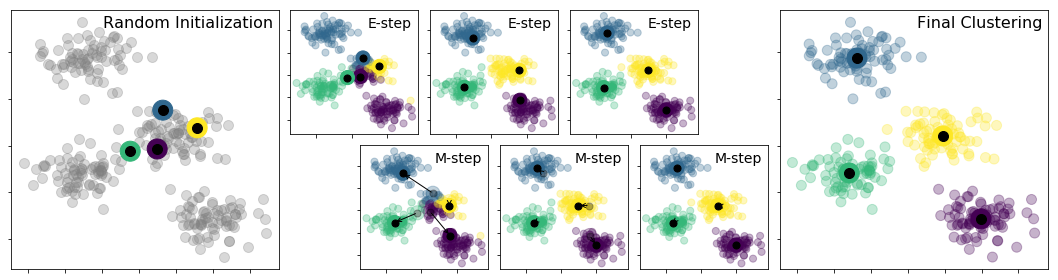

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

def draw_points(ax, c, factor = 1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap = 'viridis', s = 50*factor, alpha = 0.3)

def draw_centers(ax, centers, factor = 1, alpha = 1.0):
    ax.scatter(centers[:, 0], centers[:, 1], c = np.arange(4), cmap = 'viridis', s = 200*factor, alpha = alpha)
    ax.scatter(centers[:, 0], centers[:, 1], c = 'black', s =50*factor, alpha = alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize = (15, 4))
gs = plt.GridSpec(4, 15, left = 0.02, right = 0.98, bottom = 0.05, top = 0.95, wspace = 0.2, hspace = 0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, 'Random Initialization', transform = ax0.transAxes, ha = 'right', va = 'top', size = 16)
draw_points(ax0, 'grey', factor = 2)
draw_centers(ax0, centers, factor = 2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha = 0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i], arrowprops = dict(arrowstyle = '->', linewidth = 1))
        
    # finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, 'E-step', transform = ax1.transAxes, ha = 'right', va = 'top', size = 14)
    ax2.text(0.95, 0.95, 'M-step', transform = ax2.transAxes, ha = 'right', va = 'top', size = 14)
    
# final E-step
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor =2)
draw_centers(axf, centers, factor =2)
axf.text(0.98, 0.98, 'Final Clustering', transform = axf.transAxes, ha = 'right', va = 'top', size = 16)

fig.savefig('Expectation-Maximization Algorithm.png')

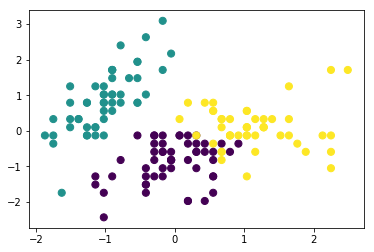

In [37]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

iris = datasets.load_iris()
features = iris.data

features_std = StandardScaler().fit_transform(features)

cluster = KMeans(n_clusters = 3, random_state = 0, n_jobs = -1).fit(features_std, iris.target)

target_pred =  cluster.fit_predict(features_std)

plt.scatter(features_std[:, 0], features_std[:, 1], c =target_pred, s = 50, cmap = 'viridis')

#### **1.2 Speeding up K-means clustering**
* Based on a random sample of observations, NOT entire observations
* Batch size $\uparrow\ \Longrightarrow$ Computational cost $\uparrow$

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans

iris = datasets.load_iris()
features = iris.data

feature_std = StandardScaler().fit_transform(features)

mb_cluster = MiniBatchKMeans(n_clusters = 3, random_state = 0, batch_size = 100)
mb_model = mb_cluster.fit(features_std)

#### **1.3 Limitations**
* <font color=brown size =3><b>1.3.1 Global optimal $\Longrightarrow$ might not achieve</b></font>

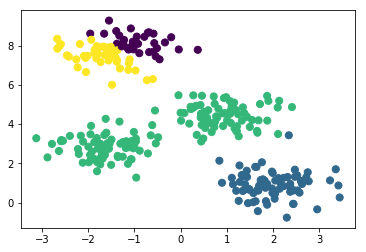

In [24]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed = 2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a, assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b, find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c, check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4, rseed = 3)
plt.scatter(X[:, 0], X[:, 1], c = labels, s=50, cmap = 'viridis')

* <font color=red size =3><b>1.3.2 Pre-setting the number of clusters</b></font>

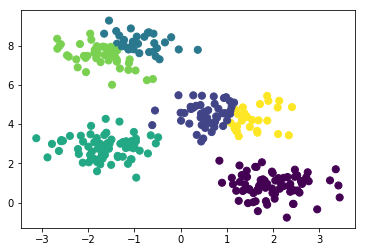

In [27]:
from sklearn.cluster import KMeans
labels = KMeans(6, random_state = 0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis')

* <font color=red size =3>Solution: Estimating the Accuracy Score</font>

In [39]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
features = iris.data
targets = iris.target

features_std = StandardScaler().fit_transform(features)

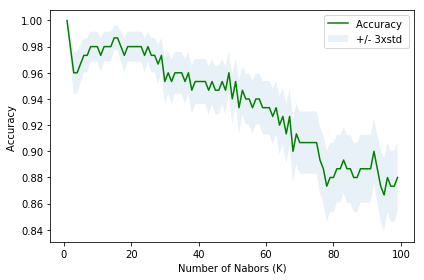

In [40]:
%matplotlib inline

Ks= 100

mean_acc =np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
CoufusionMx = [];

for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(features, targets)
    yhat = neigh.predict(features)
    mean_acc[n-1] = metrics.accuracy_score(targets, yhat)
    
    std_acc[n-1] = np.std(yhat == targets)/np.sqrt(yhat.shape[0])

# plot the mean acc by different Ks
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

* <font color=blue size =3><b>1.3.3 Only applicable to linear cluster boundaries</b></font>

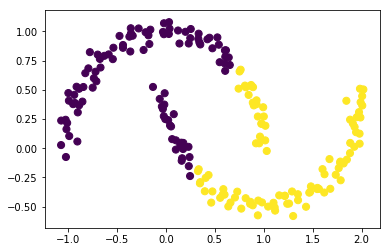

In [29]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

labels = KMeans(2, random_state = 0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap = 'viridis')

* <font color=red size = 3>Solution: kernelized _k_-means with SpectralClustering estimator</font>

/Users/mengchen/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


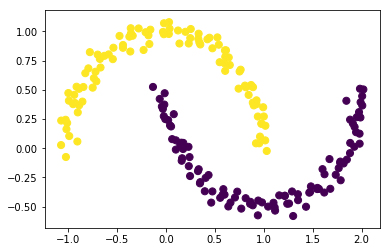

In [30]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', assign_labels = 'kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis')

### **2. Meanshift** <font size=3>(w/o assuming the number of clusters or their shape)</font>
* <b>Meanshift analogy</b>: Imagine a very foggy football field (i.e., a two-dimensional feature space) with 100 people standing on it (i.e., our observations). Because it is foggy, a person can only see a short distance. Every minute each person looks around and takes a step in the direction of the most people they can see. As time goes on, people start to group up as they repeatedly take steps toward larger and larger crowds. The end result is clusters of people around the field.
* <b>Meanshift bandwidth</b>: the radius of the area (i.e., kernel) an observation uses to determine the direction to shift. In our analogy, bandwidth was how far a person could see through the fog. 
* <b>Sometimes no other observations within an observation’s kernel</b>: by default, MeanShift assigns all these “orphan” observations to the kernel of the nearest observation. However, if we want to leave out these orphans, we can set cluster_all=False wherein orphan observations are given the label of -1.
* Pros: 
    * no assumptions on the shape and number of dataset
    * _bandwidth_ is the only parameter
    * output does NOT depend on initializations
* Cons:
    * bandwidth: too small $\Longrightarrow$ slow convergence; too large $\Longrightarrow$ coarse clusters
    * expensive computation for large feature spaces
    * slower than k-mean clustering

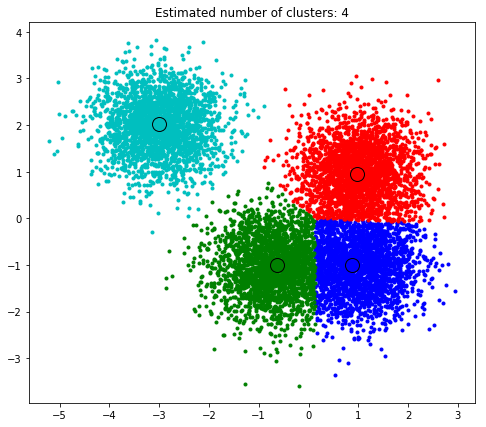

In [19]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle
from PIL import Image

centers = [[1, 1], [-0.75, -1], [1, -1], [-3, 2]]
X, _ = make_blobs(n_samples = 10000, centers = centers, cluster_std = 0.6)
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples = 500)

ms = MeanShift(bandwidth = bandwidth, bin_seeding = True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

n_clusters_ = labels.max() + 1

plt.figure(figsize = (8, 7))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

#colors = ['green', 'red', 'blue', 'brown']
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col+ '.')
    plt.plot(cluster_center[0], cluster_center[1],
            'o', markerfacecolor=col,
            markeredgecolor='k', markersize = 14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
image =  Image.open('toy.jpg')
image = np.array(image)

# convert image into feature array based on rgb intensities
flat_image = np.reshape(image, [-1, 3])
bandwidth2 = estimate_bandwidth(flat_image, quantile = 0.2, n_samples = 500)
ms = MeanShift(bandwidth2, bin_seeding = True)
ms.fit(flat_image)
labels = ms.labels_

plt.figure(2)
plt.subplot(2, 1, 1)
plt.imshow(image)
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(np.reshape(labels, [845, 1280]))
plt.axis('off')

### **3. DBSCAN**
* Assumption: 
    * Clusters are areas where many observations are densiely packed together
    * No shape is assumed
* Steps:
    * 1. A random observation, $x_i$, is chosen
    * 2. If $x_i$ has a minimum number of close neighbors, it will be considered part of a cluster
    * 3. Step 2 is repeated recursively for all of $x_i$'s neighbors, then neighbors' neighbor, and so on. (Cluster core observation)
    * 4. Once step 3 runs out of nearby observations, back to step 1 to choose a new random observation
* Three main parameters:
    * _eps_, *min_samples*, _metric_

In [6]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

iris = datasets.load_iris()
features = iris.data

feature_std = StandardScaler().fit_transform(features)

dbscan_cluster = DBSCAN(n_jobs = -1)
dbscan_model = dbscan_cluster.fit(feature_std)
dbscan_model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

### **4. Hierarchical Merging**
* At beginning, all observations start as their own cluster
* <font color=green><b>_linkage_</b></font> parameter: 'ward', 'average', 'complete'
    * <font color=red>ward</font>: variance of merged cluster
    * <font color=brown>average</font>: average distance between observations from pairs of clusters
    * <font color=orange>complete</font>: maxium distance between observations from pairs of clusters
* <font color=blue><b>_affinity_</b></font>: define the distance metric (minknowski, euclidean, etc)

In [12]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

iris = datasets.load_iris()
features = iris.data

feature_std = StandardScaler().fit_transform(features)

ag_cluster = AgglomerativeClustering(n_clusters = 3, linkage = 'complete', affinity = 'euclidean')
ag_model = ag_cluster.fit(feature_std)
ag_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])